In [160]:
# Import classes and functions
from ml_networks import *

In [235]:
# Autoreload modules - autoreloads modules so kernel relaod is not required
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# Generate standard (RDKit) descriptors - from smiles input
!python std_descs.py sample_smiles.csv sample_std.csv

In [169]:
# Load descriptors and targets - produces panda dataframe where row 1 is data, not titles
targets = pd.read_csv("sample_data.csv", header=None)
descriptors = pd.read_csv("sample_std.csv", header=None)

In [170]:
# Convert to arrays - drop column 1 (index 0) in descriptors
target_array = np.array(targets[1])
desc_array = np.array(descriptors.drop(0, axis=1))

In [228]:
# Build model 
nn_reg = Regressor(target_array, 
                   desc_array, 
                   architecture=[64,32,16], 
                   activation='relu', 
                   optimiser='Adam', 
                   learning_rate=0.005
)

nn_reg.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 884)]             0         
                                                                 
 dense (Dense)               (None, 64)                56640     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 59265 (231.50 KB)
Trainable params: 59265 (231.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 14ms/step


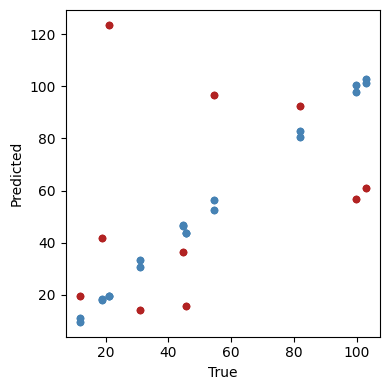

In [236]:
# Train and evaluate model using cross validation - k folds splits dataset into 3
nn_reg.train_model_cv(epochs=50, 
                      kfolds=3, 
                      plot_history=False, 
                      early_stopping=False, 
                      batch_size=8
)

In [231]:
# output of accuracy for each k-fold
nn_reg.train_scores

,MSE,PCC
0,2.913129,0.999302
1,3.990645,0.999328
2,1.302195,0.999386


In [232]:
nn_reg.test_scores

,MSE,PCC
0,1684.812649,0.041228
1,1900.351075,0.978016
2,1824.145028,0.062253


In [198]:
# If you want to use a specific test set for validation e.g.
target_array_test, desc_array_test = target_array[:3], desc_array[:3]
target_array_train, desc_array_train = target_array[3:], desc_array[3:]

In [216]:
# Build model
nn_reg = Regressor(target_array_train,
                   desc_array_train,
                   architecture=[64,32,16],
                   activation='relu',
                   optimiser='Adam',
                   learning_rate=0.005,
)

1/1 [==============================] - 0s 15ms/step


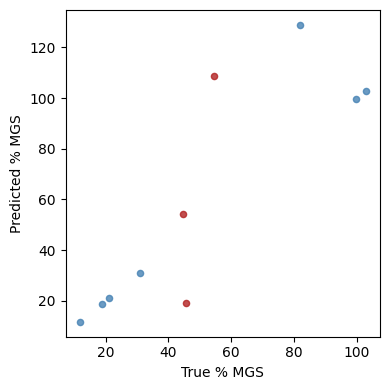

In [217]:
# Train model
nn_reg.train_model(epochs=100, 
                   test_data=[desc_array_test, target_array_test],
                   plot_history=False,
                   plot_scatter=True,
                   early_stopping=False,
                   batch_size=16
)